In [198]:
#Importing required modules.
import pandas as pd
import matplotlib.pyplot as plt
from rootpath import detect

In [47]:
#Getting path of data file.
basePath = detect()
dataPath = basePath + '/bank-full.csv'

In [50]:
#Reading data into a dataframe, since data is pretty small we should have no memory problems.
dataDF = pd.read_csv(dataPath, sep = ';')
#Checking the DF
dataDF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


For reference:

## Bank client data:

   *  age (numeric)
   *  job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   *  marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   *  education (categorical: "unknown","secondary","primary","tertiary")
   *  default: has credit in default? (binary: "yes","no")
   *  balance: average yearly balance, in euros (numeric) 
   *  housing: has housing loan? (binary: "yes","no")
   *  loan: has personal loan? (binary: "yes","no")

## Related with the last contact of the current campaign:

   *  contact: contact communication type (categorical: "unknown","telephone","cellular") 
   *  day: last contact day of the month (numeric)
   *  month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   *  duration: last contact duration, in seconds (numeric)
   
## Other attributes:

   *  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   *  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   *  previous: number of contacts performed before this campaign and for this client (numeric)
   *  poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

## Output variable (desired target):

   *  has the client subscribed a term deposit? (binary: "yes","no")


## Question 1: Which job is more likely to make a loan? Of which type?

In [158]:
#Looking at main statistics for housing and personal loans
groupedByDF = dataDF[['job','housing']].groupby(['job']).agg({'housing': 'count'}).reset_index().\
                        rename({'housing': 'total_per_job'}, axis = 1)
groupedByDFHousing = dataDF.loc[partialDF['housing']=='yes',['job', 'housing']].\
                        groupby(['job']).agg({'housing': 'count'})
groupedByDFLoan = dataDF.loc[partialDF['loan']=='yes',['job', 'loan']].\
                        groupby(['job']).agg({'loan': 'count'})

groupedByDF = groupedByDF.join(groupedByDFHousing, on = 'job', how = 'inner')
groupedByDF = groupedByDF.join(groupedByDFLoan, on = 'job', how = 'inner')

groupedByDF['housing_percentage'] = (groupedByDF['housing'] / groupedByDF['total_per_job'])*100
groupedByDF['loan_percentage'] = (groupedByDF['loan'] / groupedByDF['total_per_job'])*100
groupedByDF['total_number'] = groupedByDF['loan'] + groupedByDF['housing']
groupedByDF['total_percentage'] = ((groupedByDF['loan'] + groupedByDF['housing']) / groupedByDF['total_per_job'])*100

#Showing results ordered by percentage of loans
groupedByDF = groupedByDF.sort_values('total_percentage', ascending = False)
groupedByDF

,job,total_per_job,housing,loan,housing_percentage,loan_percentage,total_number,total_percentage
1,blue-collar,9732,7048,1684,72.420880,17.303740,8732,89.724620
7,services,4154,2766,836,66.586423,20.125181,3602,86.711603
2,entrepreneur,1487,869,356,58.439812,23.940820,1225,82.380632
0,admin.,5171,3182,991,61.535486,19.164572,4173,80.700058
9,technician,7597,4115,1309,54.166118,17.230486,5424,71.396604
6,self-employed,1579,765,229,48.448385,14.502850,994,62.951235
4,management,9458,4678,1253,49.460774,13.248044,5931,62.708818
10,unemployed,1303,543,109,41.673062,8.365311,652,50.038373
3,housemaid,1240,398,152,32.096774,12.258065,550,44.354839
5,retired,2264,491,309,21.687279,13.648410,800,35.335689


In [160]:
#Showing results ordered by total number of loans
groupedByDF = groupedByDF.sort_values('total_number', ascending = False)
groupedByDF

,job,total_per_job,housing,loan,housing_percentage,loan_percentage,total_number,total_percentage
1,blue-collar,9732,7048,1684,72.420880,17.303740,8732,89.724620
4,management,9458,4678,1253,49.460774,13.248044,5931,62.708818
9,technician,7597,4115,1309,54.166118,17.230486,5424,71.396604
0,admin.,5171,3182,991,61.535486,19.164572,4173,80.700058
7,services,4154,2766,836,66.586423,20.125181,3602,86.711603
2,entrepreneur,1487,869,356,58.439812,23.940820,1225,82.380632
6,self-employed,1579,765,229,48.448385,14.502850,994,62.951235
5,retired,2264,491,309,21.687279,13.648410,800,35.335689
10,unemployed,1303,543,109,41.673062,8.365311,652,50.038373
3,housemaid,1240,398,152,32.096774,12.258065,550,44.354839


Answer: By aggregating the results as shown above, we can see that the blue-collar profession is the one with the highest number of successful loans, both in number and percentage. Therefore, a blue-collar is more likely to order a loan than other customers from other jobs. The type of loan preferred by blue-collars is housing loans, which 72% of blue-collar customers in this database order as a bank product.

## Question 2: Observing the variables 'number of contacts for a given campaign' and 'campaign success', what are the main relevant points?

In [161]:
groupedByCampaign = dataDF[['poutcome','housing']].groupby(['poutcome']).count().reset_index().\
                        rename({'housing': 'count'}, axis = 1)
groupedByCampaign

,poutcome,count
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


The first thing we can see here is that most of the records in this database have an unknown outcome of campaign. This means that those records will not aid us in understanding the relevant characteristics relating number of contacts and campaign success. Let's look at some statistics for the number of contacts related to success and failure outcomes.

In [313]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
numberOfContactsStatistics = dataDF.loc[dataDF['poutcome']=='success',['poutcome','previous']].describe(percentiles = perc).\
                    rename({'previous' : 'success_label'}, axis = 1)
numberOfContactsStatistics['failure_label'] = dataDF.loc[dataDF['poutcome']=='failure',['poutcome','previous']].\
                    describe(percentiles = perc)
numberOfContactsStatistics

,success_label,failure_label
count,1511.000000,4901.000000
mean,3.075447,2.896552
std,2.593854,3.130252
min,1.000000,1.000000
10%,1.000000,1.000000
20%,1.000000,1.000000
30%,1.000000,1.000000
40%,2.000000,2.000000
50%,2.000000,2.000000
60%,3.000000,2.000000


Percentiles look pretty similar. However, notice that the max value for failure outcomes is almost double of the max value for success outcomes. Let's take a better look at this.

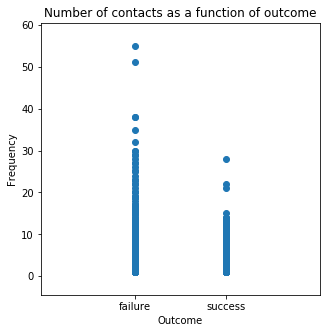

In [294]:
filteredDF = dataDF[(dataDF['poutcome']=='success') | (dataDF['poutcome']=='failure')]

plt.figure(figsize=(5, 5))
plt.scatter(filteredDF['poutcome'].astype(str), filteredDF['previous'])
plt.margins(x=1,y=0.1)
plt.title("Number of contacts as a function of outcome")
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

It appears that an increased number of calls increases the likelihood of failure outcome. It seems that 15 attempts of contact is a good threshold for call success. Let's try to make this more precise.

In [291]:
largeCallsDF = dataDF[(dataDF['previous'] >=15) & (dataDF['poutcome'].isin(['success','failure']))][['previous','poutcome']].\
                         groupby('poutcome').count().reset_index().rename({'previous': 'count'},axis = 1)
largeCallsDF

,poutcome,count
0,failure,57
1,success,4


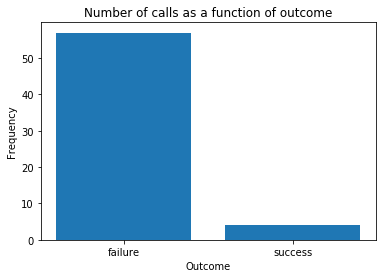

In [293]:
plt.bar(largeCallsDF['poutcome'],largeCallsDF['count'])
plt.title("Number of calls as a function of outcome")
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

At 15 seconds or longer, only about 6% of the calls result in success. Also, from the "Call duration as a function of outcome" graph, we can see that the number of samples with a success outcome decreases as the call duration increases. Therefore, we can conclude that more succinct calls are preferred by customers when it comes to campaign success. Let's take a look if the customers's job title can influence campaign success when related to number of contacts.  

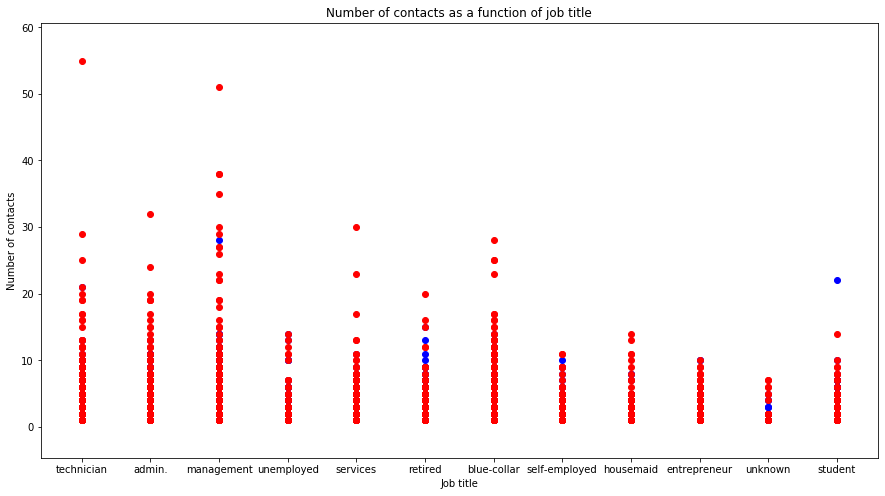

In [305]:
plt.figure(figsize=(15, 8))

plt.scatter(dataDF[dataDF['poutcome']=='success']['job'].astype(str), dataDF[dataDF['poutcome']=='success']['previous'],color='blue')
plt.scatter(dataDF[dataDF['poutcome']=='failure']['job'].astype(str), dataDF[dataDF['poutcome']=='failure']['previous'],color='red')
plt.margins(x=0.05,y=0.1)
plt.title("Number of contacts as a function of job title")
plt.xlabel('Job title')
plt.ylabel('Number of contacts')
plt.show()

Notice how success outcome presence diminishes as number of calls increase. The job title versus number of calls only seem to corroborate with the analysis above: high number of contacts should be avoided. Another factor that would be interesting to analyze is type of contact in relation to number of contacts: do customers that are contacted by cellular are more tolerant to longer calls than customers contacted by telephone, or vice versa? I will leave this out for time restrictions.

## Question 3: Using the outcome of results from the campaign, what is the average and maximum number of call you would recommend to optimize positive results?

In [315]:
#Revisiting the statistics of number of contacts:
numberOfContactsStatistics

,success_label,failure_label
count,1511.000000,4901.000000
mean,3.075447,2.896552
std,2.593854,3.130252
min,1.000000,1.000000
10%,1.000000,1.000000
20%,1.000000,1.000000
30%,1.000000,1.000000
40%,2.000000,2.000000
50%,2.000000,2.000000
60%,3.000000,2.000000


Based on the percentiles for success and failure outcomes, I would say that keeping contacts at a 3-4 count, since we had 70%-80% of success outcomes equal or lower than this rate of contacts. Besides, the mean of the number of contacts with success outcomes is 3, which also indicates that this is a good number of contacts range.

## Question 4: Are the last campaigns results relevant to the current campaign?